In [ ]:
** For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

** Instructions
** So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")


In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#from the previous lab:

customer_df.drop(['Customer'], axis=1, inplace=True)
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [4]:
customer_df.columns = customer_df.columns.str.replace(" ", "_", regex=True) # replacing spaces with underscore
customer_df.columns = customer_df.columns.str.lower()

In [5]:
numerical_df = customer_df.select_dtypes(exclude="object")
categorical_df = customer_df.select_dtypes(include="object")

In [6]:
#We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
#Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.


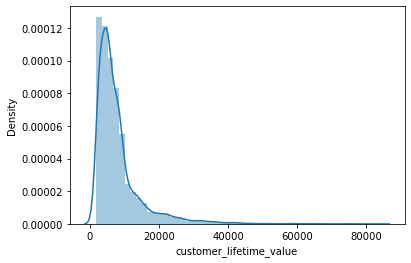

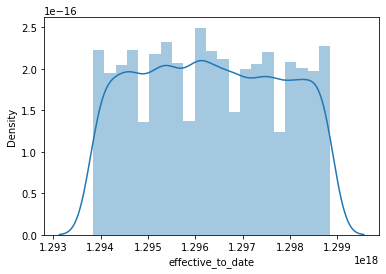

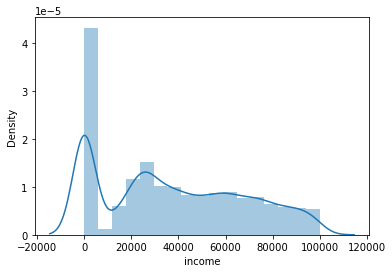

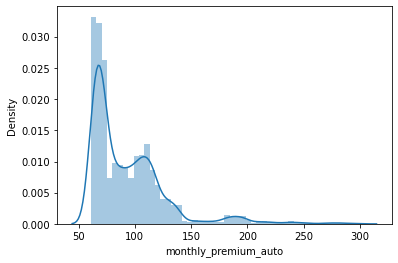

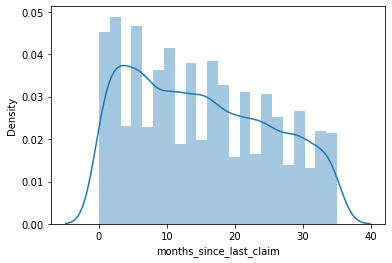

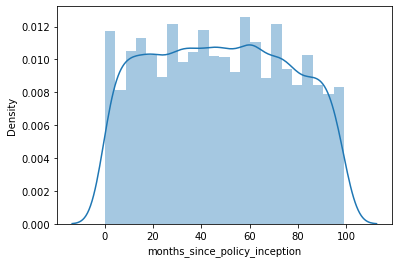

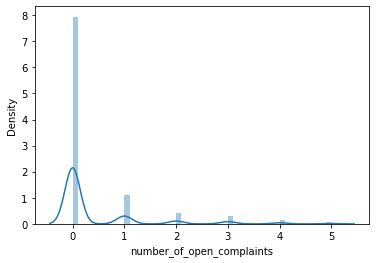

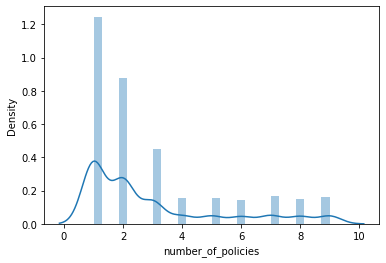

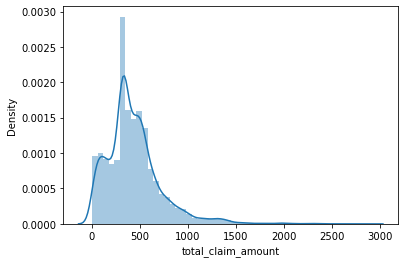

In [6]:
# checking the distribution of the main numerical features 
for col in numerical_df:
    sns.distplot(numerical_df[col])
    plt.show()

In [7]:
#In order to use boxplots to check the outliers, I'm going to drop of this dataframe the column effective_to_date as I was getting the following error:
#"Horizontal orientation requires numeric `x` variable".

numerical_df.drop(['effective_to_date'], axis=1, inplace=True)


In [8]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


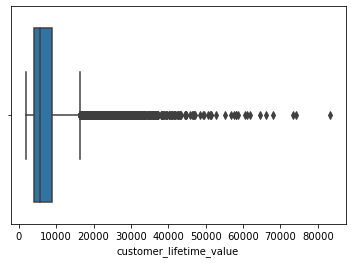

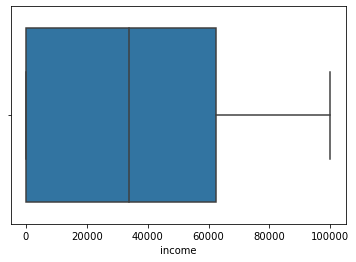

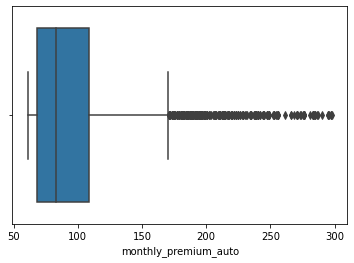

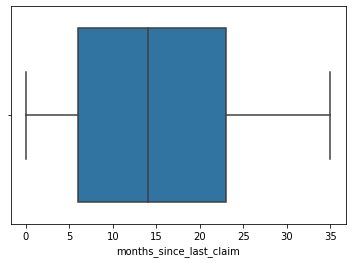

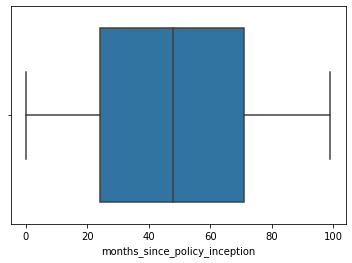

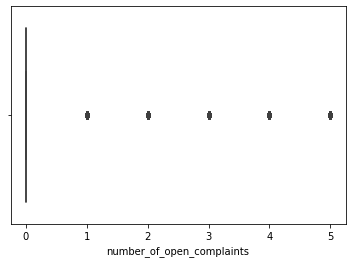

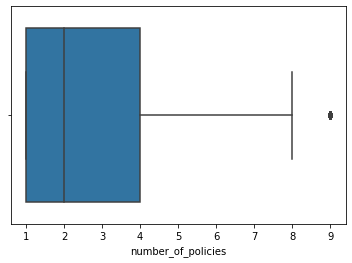

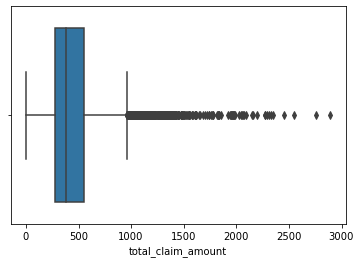

In [9]:
# checking outliers of the main numerical features through boxplots
for col in numerical_df.columns:
    sns.boxplot(numerical_df[col])
    plt.show()

In [12]:
# Use the function to remove the outliers and apply it to the dataframe.
#Looking at the boxplots, I decided to drop outliers from total_claim_amount

def rem_out(customer_df, col): 
    iqr = np.percentile(customer_df[col], 75) - np.percentile(customer_df[col], 25)
    upper_limit = np.percentile(customer_df[col], 75) + 1.5 * iqr
    lower_limit = np.percentile(customer_df[col], 25) - 1.5 * iqr
    mask = (customer_df[col] <= upper_limit) & (customer_df[col] >= lower_limit)
    df2 = customer_df[mask]
    return df2 


In [13]:
customer_df = rem_out(customer_df, "total_claim_amount")
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


In [49]:
#Create a copy of the dataframe for the data wrangling.

In [14]:
df = customer_df

In [15]:
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


In [ ]:
#Normalize the continuous variables. You can use any one method you want.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
num_df = df.select_dtypes(exclude="object")

In [18]:
#drop effective_to_date as it gives me errors
num_df = num_df.drop('effective_to_date', axis=1)

In [19]:
preprocessor = StandardScaler()
num_df = preprocessor.fit_transform(num_df)

num_df

array([[-0.77289128,  0.58058746, -0.73939039, ..., -0.42234282,
        -0.82192276, -0.02473728],
       [ 0.81498423,  0.33298694,  0.70004144, ..., -0.42234282,
        -0.40225969,  0.83551521],
       [-0.00712486, -1.27547644,  0.62622443, ..., -0.42234282,
         1.69605565,  0.66223972],
       ...,
       [ 0.07412485, -1.27547644, -0.14885426, ...,  2.86390579,
        -0.40225969,  1.89774365],
       [-0.02616877, -0.55180479,  0.25713934, ..., -0.42234282,
         0.01740338,  1.42616097],
       [-0.79668176, -1.27547644, -0.44412233, ..., -0.42234282,
        -0.82192276, -0.09676936]])

In [20]:
X=num_df

In [21]:
#Encode the categorical variables

In [21]:
cat_df = df.select_dtypes(include="object")

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
preprocessor = OneHotEncoder()
cat_df = preprocessor.fit_transform(cat_df)


In [25]:
#The time variable can be useful. Try to transform its data into a useful one. 
#Hint: Day week and month as integers might be useful.


In [24]:
df["effective_to_date"] = df["effective_to_date"].dt.strftime("%Y-%m")

In [25]:
cat_df #I need to change this result into a numpy array as X is

<8681x57 sparse matrix of type '<class 'numpy.float64'>'
	with 121534 stored elements in Compressed Sparse Row format>

In [26]:
cat_df = np.matrix(cat_df.toarray())

In [27]:
y = cat_df

In [28]:
y

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 1., 0.]])

# Lab | Comparing regression models

In [ ]:
#In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [30]:
#Try a simple linear regression with all the data to see whether we are getting good results.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score
predictions = reg.predict(X_train)

print("R2 score Train : {}".format(reg.score(X_train, y_train)))
print("R2 score Test : {}".format(reg.score(X_test, y_test)))

R2 score Train : 0.07224267010817087
R2 score Test : 0.06870667924589952


In [ ]:
#Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


In [34]:
def model(model, X_train, y_train, X_test, y_test):
    reg = model() # As first I instantiate the model as reg = LinearRegression(), I need to define reg=model, if not the def will be always aplying LinearRegression()
    model.fit = reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train) #predictions on train
    pred_test = reg.predict(X_test) # predictions on test
    print("R2 score on training set : ", reg.score(X_train, y_train))
    print("R2 score on test set : ", reg.score(X_test, y_test))
    
# I used a video on youtube to help me understand how to create a function for not to repeat the code
#https://www.youtube.com/watch?v=kZNbPGtj9WY&t=6s


In [ ]:
#Use the function to check LinearRegressor and KNeighborsRegressor.

In [35]:
#LinearRegression

model(LinearRegression, X_train, y_train, X_test, y_test)

R2 score on training set :  0.07224267010817087
R2 score on test set :  0.06870667924589952


In [ ]:
#KNeighborsRegressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
model(KNeighborsRegressor, X_train, y_train, X_test, y_test)

R2 score on training set :  0.3678386554880809
R2 score on test set :  0.018590094123405385


In [39]:
#You can check also the MLPRegressor for this task!
from sklearn.neural_network import MLPRegressor

In [40]:
model(MLPRegressor, X_train, y_train, X_test, y_test)

R2 score on training set :  0.1419710966787581
R2 score on test set :  0.12726671657908276


In [ ]:
#Check and discuss the results.

In [ ]:
#The scores of the 3 models are not good:
    #For linear regression the result on train and test are under 0.1,
    #For k neighbors the score on train altough is bad, is higher than the score on test, which means the model learn better the data than predict it. But the model is not good.
    #Last for MLP regressor, the results are a bit better than the ones on the linear regression model, but still the model is not good.
    
    